In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
loan_data = pd.read_csv('loan.csv', low_memory=False,encoding='ISO-8859-1')

In [126]:
import seaborn as sns

In [127]:
#To drop blank values
loan_data = loan_data.replace(' ', np.nan)

In [128]:
##convert 0s to Nans for ease of cleanup
## drop all the columns with 100% missing values
loan_data.dropna(how='all', inplace=True,axis=1)

In [129]:
## recheck  the data to see the new data set afterccloumn drop
arr = round(100 * (loan_data.isnull().sum() / len(loan_data.index)), 3)
arr

id                             0.000
member_id                      0.000
loan_amnt                      0.000
funded_amnt                    0.000
funded_amnt_inv                0.000
term                           0.000
int_rate                       0.000
installment                    0.000
grade                          0.000
sub_grade                      0.000
emp_title                      6.191
emp_length                     2.707
home_ownership                 0.000
annual_inc                     0.000
verification_status            0.000
issue_d                        0.000
loan_status                    0.000
pymnt_plan                     0.000
url                            0.000
desc                          33.109
purpose                        0.000
title                          0.028
zip_code                       0.000
addr_state                     0.000
dti                            0.000
delinq_2yrs                    0.000
earliest_cr_line               0.000
i

In [130]:
#since all these columns have only 0's we shall drop them
loan_data['collections_12_mths_ex_med'].describe()
loan_data['acc_now_delinq'].describe()
loan_data['chargeoff_within_12_mths'].describe()
loan_data['delinq_amnt'].describe()
loan_data['tax_liens'].describe()


count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [131]:

loan_data=loan_data.drop('collections_12_mths_ex_med',axis=1)
loan_data=loan_data.drop('acc_now_delinq',axis=1)
loan_data=loan_data.drop('chargeoff_within_12_mths',axis=1)
loan_data=loan_data.drop('delinq_amnt',axis=1)
loan_data=loan_data.drop('tax_liens',axis=1)

In [132]:
arr = round(100 * (loan_data.isnull().sum() / len(loan_data.index)), 3)
arr

id                          0.000
member_id                   0.000
loan_amnt                   0.000
funded_amnt                 0.000
funded_amnt_inv             0.000
term                        0.000
int_rate                    0.000
installment                 0.000
grade                       0.000
sub_grade                   0.000
emp_title                   6.191
emp_length                  2.707
home_ownership              0.000
annual_inc                  0.000
verification_status         0.000
issue_d                     0.000
loan_status                 0.000
pymnt_plan                  0.000
url                         0.000
desc                       33.109
purpose                     0.000
title                       0.028
zip_code                    0.000
addr_state                  0.000
dti                         0.000
delinq_2yrs                 0.000
earliest_cr_line            0.000
inq_last_6mths              0.000
mths_since_last_delinq     64.662
mths_since_las

In [133]:
loan_data=loan_data.drop('desc',axis=1)
loan_data=loan_data.drop('mths_since_last_delinq',axis=1)
loan_data=loan_data.drop('mths_since_last_record',axis=1)
loan_data=loan_data.drop('next_pymnt_d',axis=1)
loan_data=loan_data.drop('pymnt_plan',axis=1)
loan_data=loan_data.drop('out_prncp',axis=1)
loan_data=loan_data.drop('out_prncp_inv',axis=1)
loan_data=loan_data.drop('collection_recovery_fee',axis=1)
loan_data=loan_data.drop('total_rec_late_fee',axis=1)



In [134]:
loan_data.shape

(39717, 43)

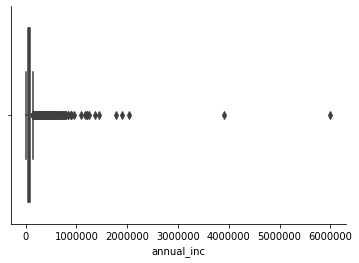

In [135]:
#outliers are present
sns.boxplot(loan_data['annual_inc'])
sns.despine()

In [136]:
#outliers removed
Q1 = loan_data.quantile(0.1)
Q3 = loan_data.quantile(0.9)
IQR = Q3 - Q1
loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

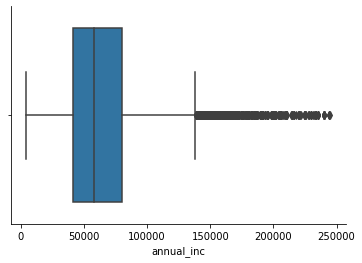

In [186]:
sns.boxplot(loan_data['annual_inc'])
sns.despine()

In [137]:
loan_data=loan_data.dropna(subset=['emp_length'])

In [138]:
loan_data['emp_length'].value_counts()

10+ years    6814
< 1 year     3874
2 years      3671
3 years      3443
4 years      2847
1 year       2739
5 years      2695
6 years      1814
7 years      1448
8 years      1186
9 years      1039
Name: emp_length, dtype: int64

In [139]:
loan_data['emp_title'].value_counts()

US Army                         111
Bank of America                  90
IBM                              48
USAF                             47
Wells Fargo                      46
                               ... 
CR Meyer                          1
Dr. Marc Parness                  1
Hansgrohe                         1
Central Texas Medical Center      1
City of Columbus                  1
Name: emp_title, Length: 23992, dtype: int64

In [140]:
loan_data=loan_data.dropna(subset=['pub_rec_bankruptcies'])
loan_data=loan_data.dropna(subset=['emp_title'])

In [141]:
loan_data['emp_title'].describe()
loan_data['funded_amnt_inv'].describe()

count    29961.000000
mean     10121.825799
std       6459.570370
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [142]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [143]:
loan_data.shape

(29961, 43)

### univariate analysis

(array([ 354., 2000., 4913., 5441., 4696., 4086., 2589., 2157., 1053.,
         828.,  615.,  328.,  336.,  135.,  138.,   83.,  106.,   43.,
          33.,   27.]),
 array([  4000.,  16050.,  28100.,  40150.,  52200.,  64250.,  76300.,
         88350., 100400., 112450., 124500., 136550., 148600., 160650.,
        172700., 184750., 196800., 208850., 220900., 232950., 245000.]),
 <a list of 20 Patch objects>)

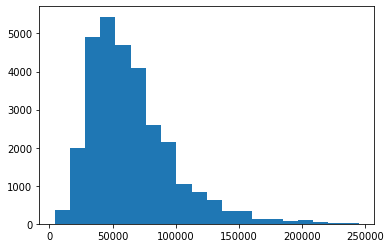

In [144]:
#annual income 
plt.hist(loan_data['annual_inc'],bins=20)

(array([ 966., 1035., 1243., 1493., 1681., 1959., 2078., 2197., 2319.,
        2324., 2231., 2021., 1977., 1880., 1652., 1469.,  953.,  195.,
         158.,  130.]),
 array([ 0.    ,  1.4995,  2.999 ,  4.4985,  5.998 ,  7.4975,  8.997 ,
        10.4965, 11.996 , 13.4955, 14.995 , 16.4945, 17.994 , 19.4935,
        20.993 , 22.4925, 23.992 , 25.4915, 26.991 , 28.4905, 29.99  ]),
 <a list of 20 Patch objects>)

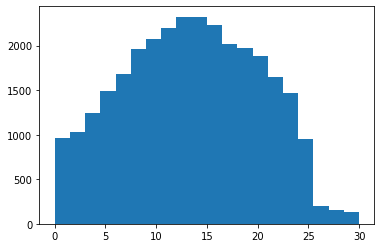

In [145]:
#dti
plt.hist(loan_data['dti'],bins=20)

(array([14694.,     0.,     0.,     0.,     0.,     0.,  2133.,     0.,
            0.,     0.,     0.,     0.,     0., 13056.,     0.,     0.,
            0.,     0.,     0.,    78.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <a list of 20 Patch objects>)

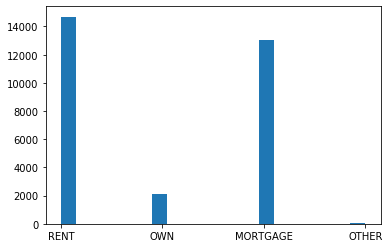

In [146]:
#Most of the people live in Rented or Mortgaged houses
plt.hist(loan_data['home_ownership'],bins=20)

(array([1461., 1718., 5471., 3058., 5868., 2423., 3819., 1442., 2021.,
         711.,  540.,  693.,  209.,  299.,   67.,   90.,   18.,   33.,
           7.,   13.]),
 array([ 2.  ,  3.45,  4.9 ,  6.35,  7.8 ,  9.25, 10.7 , 12.15, 13.6 ,
        15.05, 16.5 , 17.95, 19.4 , 20.85, 22.3 , 23.75, 25.2 , 26.65,
        28.1 , 29.55, 31.  ]),
 <a list of 20 Patch objects>)

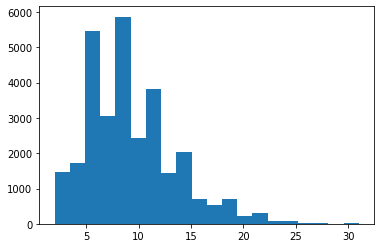

In [147]:
#number of open_acc
plt.hist(loan_data['open_acc'],bins=20)

In [148]:
#loan_data['zip_code'].value_counts().plot(kind='bar',scalex=True).get_figure(size=(200,100))

(array([1355., 2388., 4046., 3580., 3044., 3249., 2727., 1389., 2738.,
         553.,  819., 1611.,  301.,  556.,  960.,  137.,   30.,  191.,
          26.,  261.]),
 array([  500.,  2225.,  3950.,  5675.,  7400.,  9125., 10850., 12575.,
        14300., 16025., 17750., 19475., 21200., 22925., 24650., 26375.,
        28100., 29825., 31550., 33275., 35000.]),
 <a list of 20 Patch objects>)

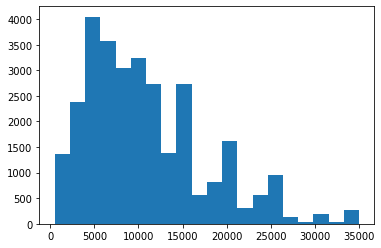

In [149]:
#most of the applications are coming from 5,000 
plt.hist(loan_data['loan_amnt'],bins=20)

In [150]:
loan_data.pivot_table(values="loan_amnt",index="emp_length")

,loan_amnt
emp_length,
1 year,9873.418090
10+ years,12222.364782
2 years,9856.783991
3 years,10387.931295
4 years,10613.685071
5 years,10814.224971
6 years,11020.031866
7 years,11448.378963
8 years,10918.672566


In [151]:
loan_data['loan_status']=='Charged Off'

3        False
4        False
5        False
6        False
7        False
         ...  
38998    False
38999    False
39000    False
39001     True
39002    False
Name: loan_status, Length: 29961, dtype: bool

In [152]:
#number of enquires in the last 6 months
loan_data.pivot_table(values="inq_last_6mths",index="id")

,inq_last_6mths
id,
55742,0
57245,0
57416,1
58915,1
62102,0
...,...
1070078,2
1072053,2
1075269,3


(array([27501.,     0.,     0.,     0.,     0.,   908.,     0.,     0.,
            0.,  1552.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

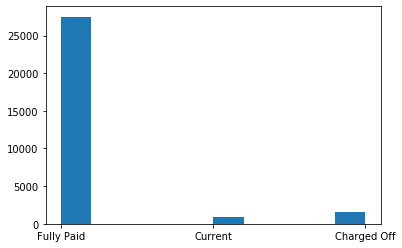

In [153]:
#there are some people who are charged off
plt.hist(loan_data['loan_status'])

In [154]:
#the reasons that are giving
loan_data['title'].value_counts()

Debt Consolidation                      1697
Debt Consolidation Loan                 1281
Personal Loan                            513
Consolidation                            411
debt consolidation                       364
                                        ... 
Credit Card Attack                         1
To import beauty supplies from CHINA       1
Responsibly getting out of debt.           1
Patricks Debt consolidation                1
Mistakes                                   1
Name: title, Length: 15184, dtype: int64

In [155]:
loan_data['addr_state'].value_counts()

CA    5326
NY    2937
TX    2129
FL    2094
NJ    1403
PA    1200
IL    1186
VA    1075
GA    1053
MA    1039
OH     909
MD     775
AZ     633
WA     588
CO     583
CT     561
NC     559
MI     535
MO     505
MN     470
NV     357
SC     352
AL     345
OR     344
WI     341
LA     326
KY     248
OK     228
KS     215
UT     194
DC     193
AR     190
RI     149
NM     136
HI     133
WV     133
NH     127
DE      87
WY      68
MT      60
AK      59
SD      45
VT      42
MS      16
TN       8
ID       3
IA       1
NE       1
Name: addr_state, dtype: int64

In [156]:
loan_data['total_acc'].value_counts()

15    1114
14    1108
17    1098
21    1092
18    1086
      ... 
71       1
80       1
70       1
72       1
79       1
Name: total_acc, Length: 76, dtype: int64

In [162]:
df_purpose=loan_data.groupby('loan_status')

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

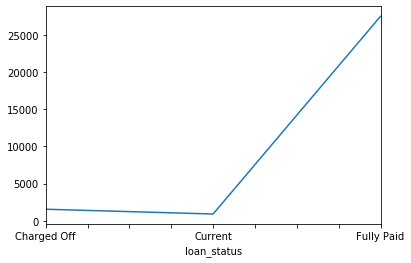

In [163]:
df_purpose.loan_amnt.count().plot().bar()

In [165]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [166]:
loan_data['pending_percent']=(loan_data['total_rec_int']/loan_data['total_pymnt'])*100

In [168]:
df=loan_data['loan_status']=="Charged Off"
df1=loan_data[df]
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,pending_percent
21,1039153,1269083,21000,21000,21000.000000,36 months,12.42%,701.73,B,B4,...,10694.96,3330.44,0.00,Sep-13,701.73,May-16,1,INDIVIDUAL,0.0,23.745776
26,1069800,1304679,15000,15000,8725.000000,36 months,14.27%,514.64,C,C2,...,0.00,0.00,0.00,NaN,0.00,May-16,1,INDIVIDUAL,0.0,NaN
55,1069410,1303652,21000,21000,20975.000000,60 months,19.91%,555.33,E,E4,...,8990.81,9328.33,0.00,Oct-14,555.33,May-16,1,INDIVIDUAL,0.0,50.921222
71,1060981,1292558,6400,6400,6400.000000,36 months,16.77%,227.45,D,D2,...,3334.25,1431.91,10.29,Oct-13,227.45,May-16,1,INDIVIDUAL,0.0,29.978541
131,1066215,1300572,24000,24000,24000.000000,36 months,15.96%,843.30,C,C5,...,3813.57,2082.11,0.00,Aug-12,843.30,May-16,1,INDIVIDUAL,0.0,35.315858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38943,296386,296368,25000,25000,6886.537159,36 months,12.61%,837.67,D,D1,...,11637.78,4640.14,0.00,Mar-10,938.66,May-16,1,INDIVIDUAL,0.0,28.505730
38946,296068,296051,8000,8000,6825.000025,36 months,8.32%,251.88,A,A4,...,2439.42,571.38,10.86,Apr-09,251.88,Feb-09,1,INDIVIDUAL,0.0,18.909474
38965,289873,289870,16400,16400,5775.002751,36 months,11.03%,537.15,C,C1,...,15089.79,2515.49,0.00,Mar-10,5809.23,May-16,1,INDIVIDUAL,0.0,14.288270
38987,287421,287409,9500,9500,7625.000924,36 months,11.66%,314.00,C,C3,...,1358.11,519.29,0.00,Sep-08,314.00,Apr-16,1,INDIVIDUAL,0.0,27.660062


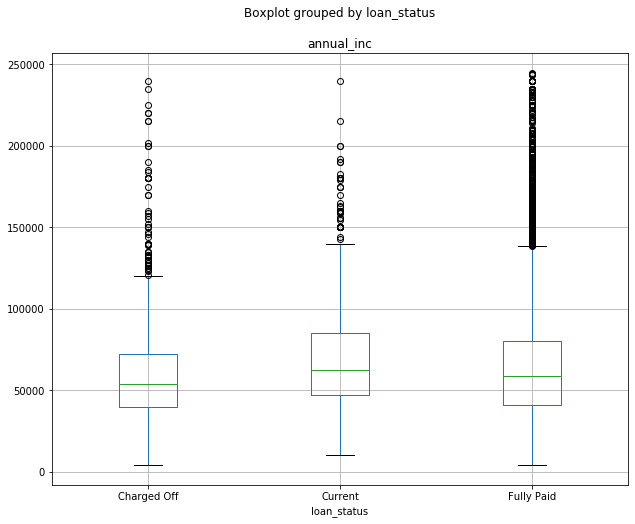

In [169]:
#people how charged off have average salary of 50k
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')

loan_data.boxplot(column=['annual_inc'], by='loan_status', ax=ax)


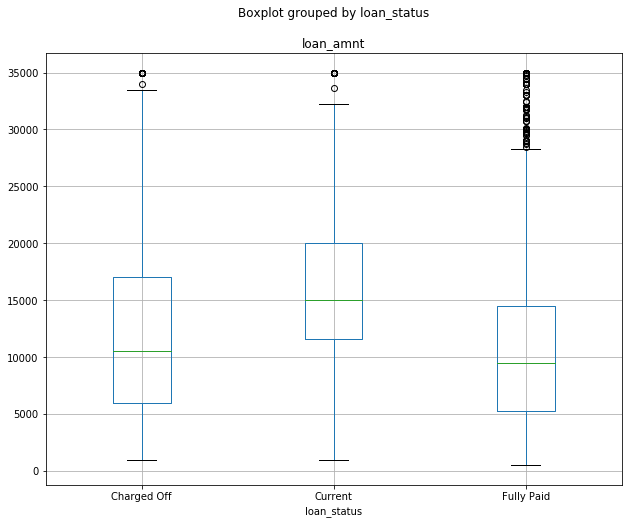

In [170]:
#people who are charged off have taken a loan amount of 10k
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')

loan_data.boxplot(column=['loan_amnt'], by='loan_status', ax=ax)


In [171]:
df=loan_data['loan_status']=="Charged Off"
df1.groupby(['loan_status','purpose']).count()['loan_amnt']

loan_status  purpose           
Charged Off  car                    45
             credit_card           153
             debt_consolidation    824
             educational            13
             home_improvement       92
             house                  11
             major_purchase         51
             medical                28
             moving                 18
             other                 180
             renewable_energy        1
             small_business         99
             vacation               16
             wedding                21
Name: loan_amnt, dtype: int64

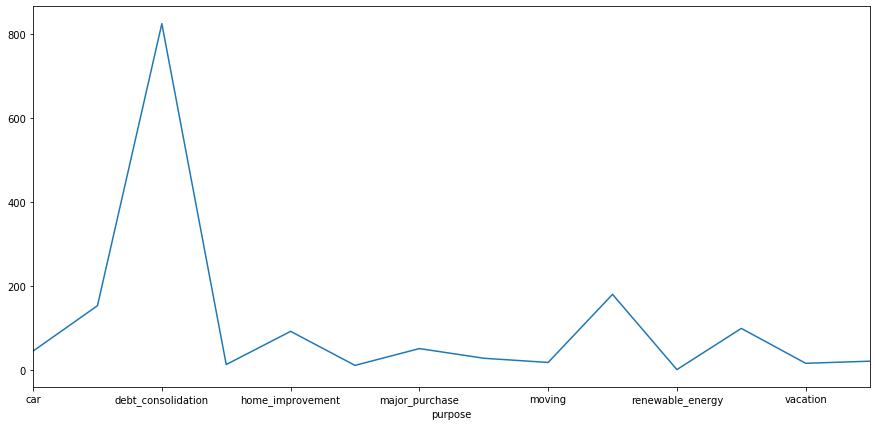

In [172]:
#people who take loans on debt_consolidation default on their loans
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['purpose']).count()['loan_amnt'].plot(ax=ax)


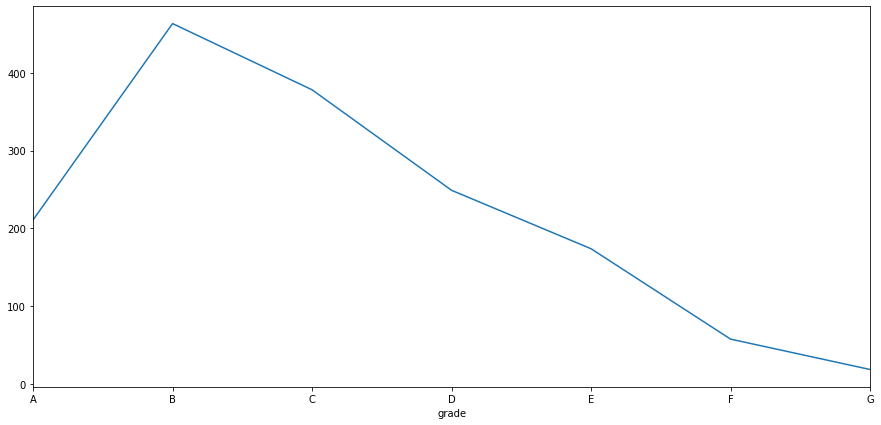

In [183]:
#most of the loans are of Grade type B
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['grade']).count()['loan_amnt'].plot(ax=ax)


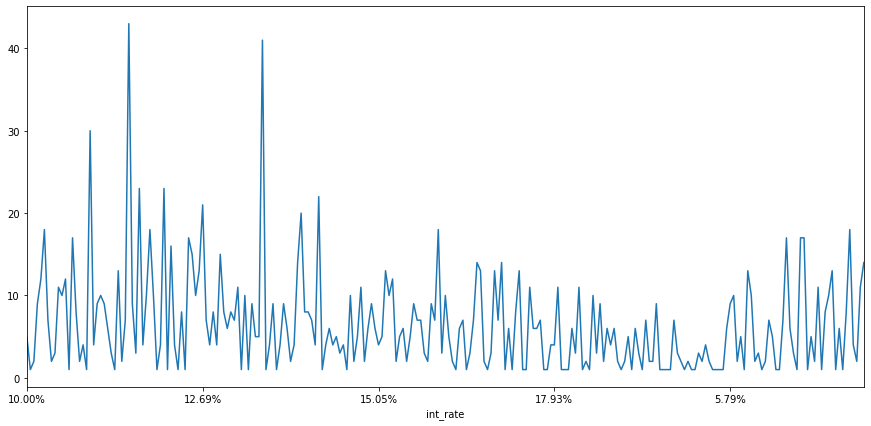

In [185]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['int_rate']).count()['loan_status'].plot(ax=ax)

In [174]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies', 'pending_percent'],
      dtype='object')

In [175]:
#the mean value of dti more than 33.8 % is likely to default
df1['pending_percent'].describe()

count    1539.000000
mean       33.857451
std        13.725115
min         8.028066
25%        23.311289
50%        31.898646
75%        43.751405
max       100.000000
Name: pending_percent, dtype: float64

In [176]:
df1[['total_pymnt','loan_status','verification_status','earliest_cr_line']]

,total_pymnt,loan_status,verification_status,earliest_cr_line
21,14025.40,Charged Off,Verified,Feb-83
26,0.00,Charged Off,Not Verified,Oct-03
55,18319.14,Charged Off,Verified,Sep-98
71,4776.45,Charged Off,Not Verified,Dec-94
131,5895.68,Charged Off,Source Verified,Jun-95
...,...,...,...,...
38943,16277.92,Charged Off,Not Verified,Apr-88
38946,3021.66,Charged Off,Not Verified,Jan-89
38965,17605.28,Charged Off,Not Verified,Feb-03
38987,1877.40,Charged Off,Not Verified,Nov-01


In [177]:
df2=df1.groupby('verification_status')

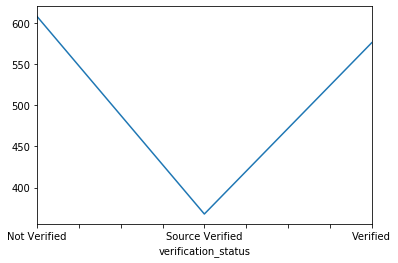

In [178]:
#people who are source verified are less charged off
df2['verification_status'].count().plot()

## Bivariate Analysis

In [182]:
corr = loan_data.corr()

corr.style.background_gradient(cmap='coolwarm')


,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,pending_percent
id,1,0.993251,0.111362,0.0625256,0.0356303,0.0805832,-0.0142703,-0.043739,0.0222975,0.00533325,0.0278789,0.122533,0.180401,0.106638,0.143193,0.00416386,0.115041,0.0775303
member_id,0.993251,1,0.112439,0.0586125,0.0365488,0.0817965,-0.0141446,-0.047831,0.0207043,0.000596062,0.0300849,0.124176,0.18988,0.1081,0.145024,0.00433408,0.118054,0.0785137
loan_amnt,0.111362,0.112439,1,0.922478,0.381833,0.0700169,-0.0451113,-0.00330599,0.166912,0.340666,0.238315,0.916499,0.892519,0.911314,0.733538,0.0323558,0.418796,0.263035
installment,0.0625256,0.0586125,0.922478,1,0.377256,0.0591455,-0.032515,-0.00109256,0.158945,0.335793,0.208954,0.880227,0.852263,0.903043,0.622258,0.0144196,0.364527,0.148145
annual_inc,0.0356303,0.0365488,0.381833,0.377256,1,-0.132705,0.0339599,0.0376199,0.247959,0.381112,0.373208,0.363957,0.35284,0.374925,0.252803,-0.0226952,0.17804,0.0159655
dti,0.0805832,0.0817965,0.0700169,0.0591455,-0.132705,1,-0.0371818,0.00833864,0.29205,0.286761,0.227267,0.0748962,0.078009,0.0549102,0.117822,0.0292107,0.0139257,0.133131
delinq_2yrs,-0.0142703,-0.0141446,-0.0451113,-0.032515,0.0339599,-0.0371818,1,0.00685655,0.0103099,-0.0605636,0.0627644,-0.0379506,-0.0425406,-0.0502014,0.00642458,0.00358802,-0.0106828,0.0679943
inq_last_6mths,-0.043739,-0.047831,-0.00330599,-0.00109256,0.0376199,0.00833864,0.00685655,1,0.0935287,-0.0215716,0.110515,-0.0132306,-0.0194051,-0.0233277,0.0194069,0.026676,0.0294026,0.0751683
open_acc,0.0222975,0.0207043,0.166912,0.158945,0.247959,0.29205,0.0103099,0.0935287,1,0.30629,0.680538,0.15045,0.143045,0.152253,0.112602,0.0137742,0.0709313,0.026431
revol_bal,0.00533325,0.000596062,0.340666,0.335793,0.381112,0.286761,-0.0605636,-0.0215716,0.30629,1,0.328013,0.31654,0.301853,0.311157,0.264002,0.0138591,0.113209,0.113717


### It is oberseved that open acc and dti are positively correlated 
### it is observed that revolving balance and load amount are positively correlated
### it is observed that total account and dti are positively correlated

In [181]:
#dropping these columns cause they are not used in correlation
loan_data=loan_data.drop('funded_amnt',axis=1)
loan_data=loan_data.drop('pub_rec',axis=1)
loan_data=loan_data.drop('policy_code',axis=1)
loan_data=loan_data.drop('pub_rec_bankruptcies',axis=1)
loan_data=loan_data.drop('funded_amnt_inv',axis=1)



KeyError: "['funded_amnt'] not found in axis"